In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data
from skimage.util import img_as_ubyte

In [4]:
!pip3 install scikit-image

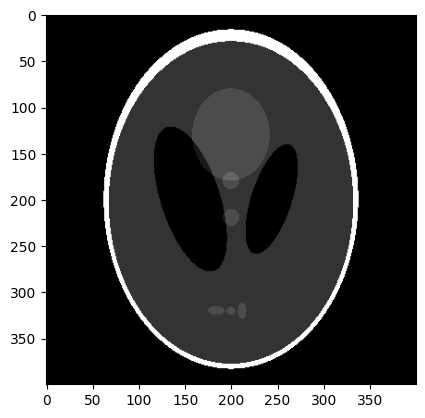

In [5]:
orig_phantom = img_as_ubyte(data.shepp_logan_phantom())
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)

## URL

shorturl.at/wHMOW

In [6]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

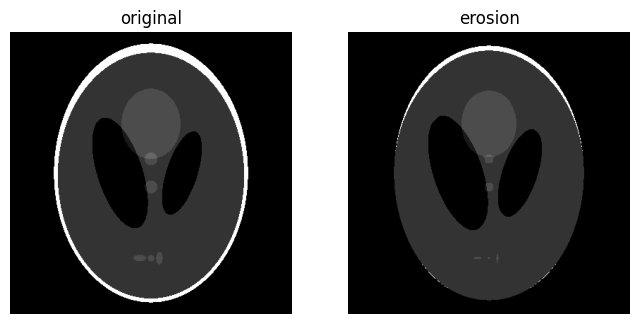

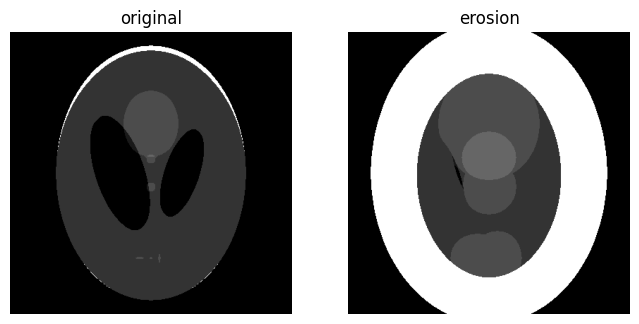

In [17]:
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  # noqa
from skimage.morphology import disk, square, diamond  # noqa

structuring_element = disk(30)

eroded = erosion(orig_phantom, footprint)
plot_comparison(orig_phantom, eroded, 'erosion')

dilated = dilation(orig_phantom, structuring_element)
plot_comparison(eroded, dilated, 'erosion')

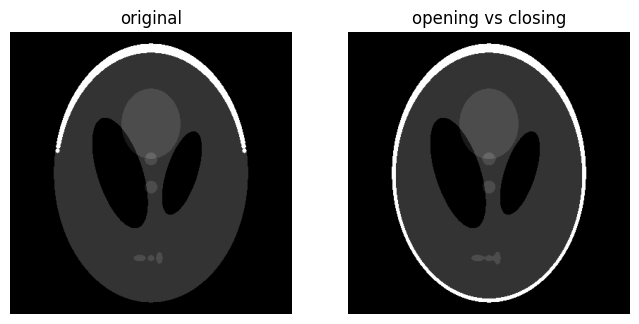

In [22]:
structuring_element = disk(3)


opened = opening(orig_phantom, structuring_element)
closed = closing(orig_phantom, structuring_element)

plot_comparison(opened, closed, 'opening vs closing')

## "Chapeau haut de forme"

- Par anti-extensivité de l'ouverture, on a $\gamma_\Gamma(I) \leq I$, donc $I-\gamma_\Gamma(I)$ est une image (positive)
- Par extensivité de la fermeture, on a $\phi_\Gamma(I) \geq I$, donc $\phi_\Gamma(I)-I$ est une image (positive)

In [29]:
def chapeau_blanc(I,SE):
    ouv=opening(I,SE)
    return(I-ouv)

def chapeau_noir(I,SE):
    clo=closing(I,SE)
    return(clo-I)

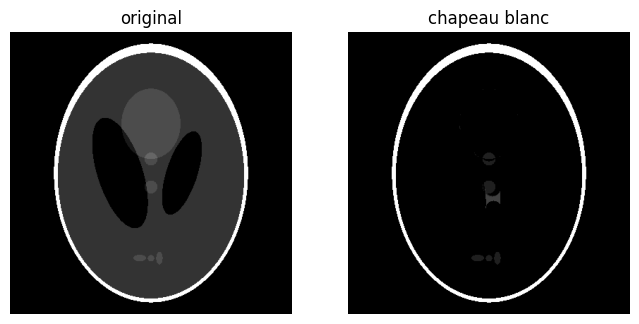

In [30]:
structuring_element=disk(11)
wth = chapeau_blanc(orig_phantom,structuring_element)

plot_comparison(orig_phantom, wth, 'chapeau blanc')

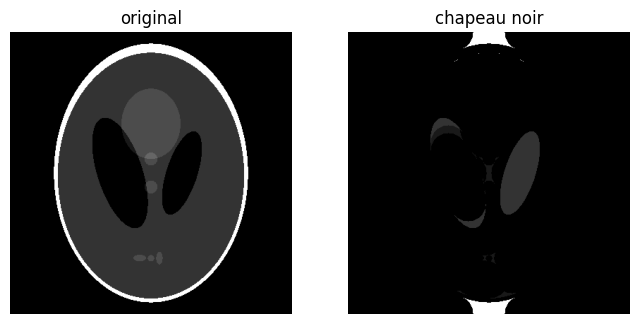

In [31]:
structuring_element=disk(25)
bth = chapeau_noir(orig_phantom,structuring_element)

plot_comparison(orig_phantom, bth, 'chapeau noir')